In [1]:
pip install --user kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 713M/715M [00:46<00:00, 36.3MB/s]
100% 715M/715M [00:46<00:00, 16.2MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
file_name = "cifar-10.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.9 MB/s eta 0:00:00


In [8]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close

<bound method SevenZipFile.close of <py7zr.py7zr.SevenZipFile object at 0x7eaf2e606b00>>

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['36480.png', '41691.png', '49662.png', '36943.png', '45286.png']
['38080.png', '10744.png', '8329.png', '20179.png', '26752.png']


In [15]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df[labels_df['id']==30044]

,id,label
30043,30044,truck


In [18]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [19]:
value=sorted(list(set(labels_df['label'])))

In [20]:
value

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [21]:
labels_dictionary={j:i for i,j in enumerate(value)}

In [22]:
labels_dictionary

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [23]:
labels = [labels_dictionary[i] for i in labels_df['label']]

In [24]:
id_list = list(labels_df['id'])

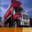

In [25]:
import cv2

from google.colab.patches import cv2_imshow

img =cv2.imread('/content/train/30044.png')
cv2_imshow(img)

In [26]:
train_data_folder ='/content/train/'

data = []
for id in id_list:
  image =Image.open(train_data_folder+ str(id) +'.png')
  image = image.resize((32,32))
  data.append(np.array(image))

In [27]:
type(data[0])

numpy.ndarray

In [28]:
len(data)

50000

In [29]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
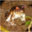

In [30]:
data[0]

In [31]:
X = np.array(data)
y= np.array(labels)


In [32]:
X.shape

(50000, 32, 32, 3)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [35]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 3ms/step - loss: 1.9652 - accuracy: 0.2859 - val_loss: 1.8350 - val_accuracy: 0.3415
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8250 - accuracy: 0.3466 - val_loss: 1.8034 - val_accuracy: 0.3535
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7573 - accuracy: 0.3731 - val_loss: 1.7349 - val_accuracy: 0.3803
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7244 - accuracy: 0.3840 - val_loss: 1.7319 - val_accuracy: 0.3855
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7030 - accuracy: 0.3932 - val_loss: 1.7091 - val_accuracy: 0.3932
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6832 - accuracy: 0.3972 - val_loss: 1.7488 - val_accuracy: 0.3805
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6690 - accuracy: 0.4023 - val_loss: 1.6854 - val_accuracy:

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [40]:
convolution_base =  ResNet50(weights = 'imagenet', include_top=False, input_shape=(256,256,3))
convolution_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [42]:
model = Sequential()
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(convolution_base)
model.add(Flatten())
model.add(layers.BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(Dense(num_of_classes, activation='relu'))

In [44]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [46]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1,epochs=5)

Epoch 1/5
1125/1125 [==============================] - 436s 388ms/step - loss: 3.3594 - acc: 0.4372 - val_loss: 2.2232 - val_acc: 0.6543
Epoch 2/5
1125/1125 [==============================] - 435s 387ms/step - loss: 3.0587 - acc: 0.4707 - val_loss: 2.0232 - val_acc: 0.7028
Epoch 3/5
1125/1125 [==============================] - 436s 388ms/step - loss: 2.7442 - acc: 0.5128 - val_loss: 2.0236 - val_acc: 0.7147
Epoch 4/5
1125/1125 [==============================] - 436s 388ms/step - loss: 2.4476 - acc: 0.5505 - val_loss: 1.5848 - val_acc: 0.7602
Epoch 5/5
1125/1125 [==============================] - 436s 388ms/step - loss: 2.2355 - acc: 0.5822 - val_loss: 1.2649 - val_acc: 0.7908


<function matplotlib.pyplot.show(close=None, block=None)>

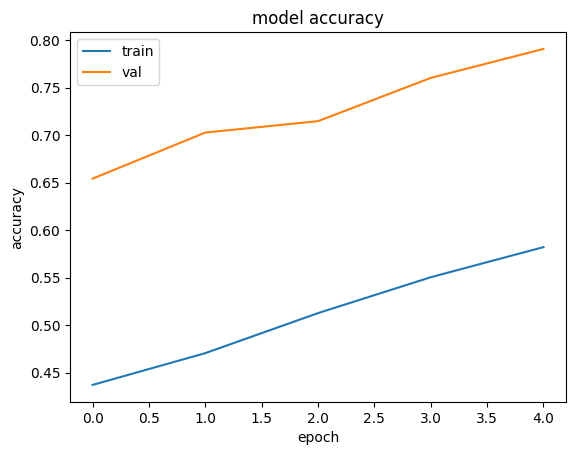

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show

In [48]:
y_pred=model.predict(X_test_scaled)
test_accuracy = np.sum(np.argmax(y_pred, axis=1) == y_test)/len(y_test)
print(test_accuracy)

313/313 [==============================] - 37s 112ms/step
0.7882
